# Химпром

**Химическая промышленность / [Химпром](https://www.himprom.com/) (HIMC[P])**

Химпром производит широкий ассортимент химической продукции:
**Дезинфицирующие средства**,
Неорганические продукты,
Органические продукты,
Фосфорорганические продукты,
Комплексоны,
ПАВ и технические моющие средства и т.д.

Кажется именно эта компания сможет извлечь наибольшую выгоду из коронавируса

[Conomy](https://www.conomy.ru/emitent/himprom/himc-ifrs-pu)

## Менеджмент

...

In [2]:
company = 'HIMC'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dt = pd.read_csv(f'../tables/data_{company}.csv', index_col=0)
dt = dt.sort_index()
n_years = len(dt.index)

In [5]:
dt

,revenue,cost_price,capital,assets,net_profit,short_obligations,current_assets,price_pref,common_stocks,preffered_stocks,dividend_pref,price_common
2012,5.780000e+09,4.280000e+09,2.240000e+09,5.120000e+09,2.450000e+08,2.170000e+09,2.140000e+09,0.94,688900000.0,229600000.0,NaN,0.99
2013,5.690000e+09,4.340000e+09,2.070000e+09,5.800000e+09,-1.470000e+08,3.310000e+09,2.230000e+09,1.00,688900000.0,229600000.0,NaN,0.99
2014,6.060000e+09,4.460000e+09,2.060000e+09,6.650000e+09,3.400000e+06,4.230000e+09,2.290000e+09,1.05,688900000.0,229600000.0,NaN,0.99
2015,7.730000e+09,5.380000e+09,2.320000e+09,6.610000e+09,2.510000e+08,3.440000e+09,2.250000e+09,1.07,688900000.0,229600000.0,NaN,0.99
2016,9.230000e+09,6.370000e+09,2.450000e+09,7.470000e+09,6.500000e+08,3.290000e+09,2.730000e+09,6.99,688900000.0,229600000.0,NaN,0.99
2017,1.045000e+10,7.140000e+09,2.640000e+09,8.800000e+09,6.470000e+08,3.100000e+09,3.100000e+09,5.60,688900000.0,229600000.0,NaN,0.99
2018,1.448000e+10,1.035000e+10,3.300000e+09,1.065000e+10,1.090000e+09,4.900000e+09,4.000000e+09,6.04,688900000.0,229600000.0,114300000.0,0.99
2019,1.485000e+10,1.045000e+10,3.940000e+09,1.120000e+10,1.100000e+09,5.100000e+09,4.260000e+09,6.07,688900000.0,229600000.0,113400000.0,0.99


In [6]:
dt['obligations'] = dt['assets'] - dt['capital']
dt['capitalization'] = dt['common_stocks']*dt['price_common'] + dt['preffered_stocks']*dt['price_pref']

## Динамика выручки, капитала, обязательств, активов

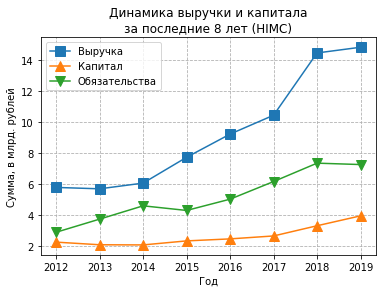

In [8]:
plt.plot(dt.index, dt['revenue']*1e-9, marker='s', ms=10, label='Выручка')
plt.plot(dt.index, dt['capital']*1e-9, marker='^', ms=10, label='Капитал')
plt.plot(dt.index, dt['obligations']*1e-9, marker='v', ms=10, label='Обязательства')
plt.xticks(dt.index, dt.index)
plt.legend()
plt.title(f'Динамика выручки и капитала\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд. рублей')
plt.grid(ls='--')
plt.savefig('../images/revenue.png', dpi=200)

На графике видно, как выручка идёт вверх даже без коронавируса. Хорошо.

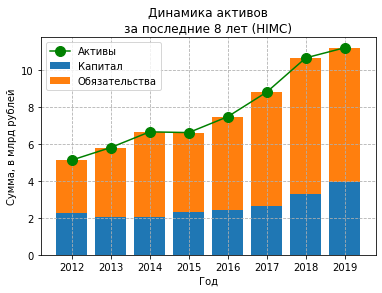

In [9]:
plt.plot(dt.index, dt['assets']*1e-9, marker='o', ms=10, label='Активы', c='g')
plt.bar(dt.index, dt['capital']*1e-9, label='Капитал')
plt.bar(dt.index, dt['obligations']*1e-9, bottom=dt['capital']*1e-9, label='Обязательства')
plt.xticks(dt.index, dt.index)
plt.legend()
plt.title(f'Динамика активов\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/assets.png', dpi=200)

С активами тоже всё неплохо: компания растёт, особенно это заметно в последние годы. 
Возможно это связано с импортозамещением, государство поддерживает их и позволяет занимать рынок

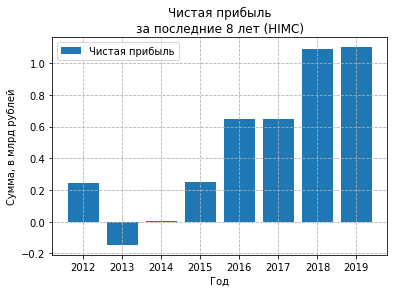

In [10]:
name = "Чистая прибыль"
# plt.plot(dt.index, dt['net_profit']*1e-9, marker='o', ms=10, label='Чистая прибыль')
plt.bar(dt.index, dt['net_profit']*1e-9, label='Чистая прибыль')
plt.xticks(dt.index, dt.index)
plt.legend()
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/net_profit.png', dpi=200)

С чистой прибылью в последние годы тоже всё здорово, особенно в 2018 и 2019.

Возможно в 2020 будет пушка

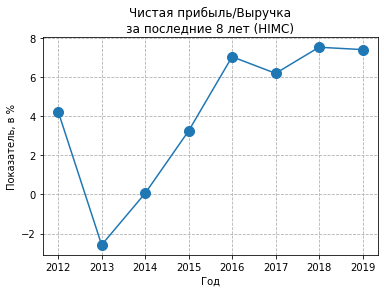

In [12]:
name = "Чистая прибыль/Выручка"
# plt.plot(dt.index, dt['net_profit']*1e-9, marker='o', ms=10, label='Чистая прибыль')
plt.plot(dt.index, 100*dt['net_profit']/dt['revenue'], marker='o', ms=10, label='Чистая прибыль/Выручка')
plt.xticks(dt.index, dt.index)
# plt.legend()
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Показатель, в %')
plt.grid(ls='--')
plt.savefig('../images/net_profit_over_revenue.png', dpi=200)

Хороший показатель Чистой прибыли к Выручке тоже радует

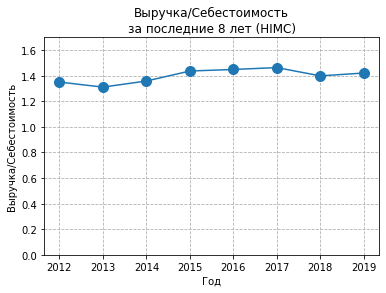

In [13]:
name = "Выручка/Себестоимость"
plt.plot(dt.index, dt['revenue']/dt['cost_price'], marker='o', ms=10, label=name)
plt.xticks(dt.index, dt.index)
# plt.legend()
plt.ylim(0, 1.7)
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}')
plt.grid(ls='--')
plt.savefig('../images/revenue_cost_price.png', dpi=200)

Хороший показатель Выручки к Себестоимости (что-то вроде добавленной стоимости). В последние годы даже немного подрос

...


## Коэффициент текущей ликвидности

показывает, как компания может погашать текущие обязательства за счет только оборотных активов.
Чем выше коэффициент, тем выше платежеспособность предприятия. Если этот показатель ниже 1,5, значит, предприятие не в состоянии вовремя оплачивать все счета.

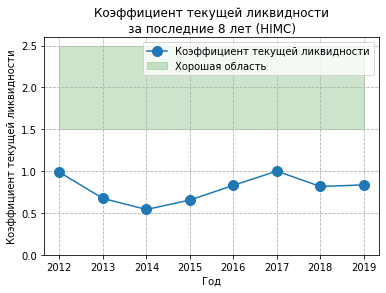

In [17]:
name = "Коэффициент текущей ликвидности"
plt.plot(dt.index, dt['current_assets']/dt['short_obligations'], marker='o', ms=10, label=name)
plt.fill_between([dt.index.min(),dt.index.max()], [1.5, 1.5], [2.5, 2.5], color='green', alpha=0.2, label='Хорошая область')
plt.xticks(dt.index, dt.index)
plt.legend()
plt.ylim(0, None)
plt.title(f'{name}\nза последние {len(dt.index)} лет ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}')
plt.grid(ls='--')
plt.savefig('../images/liquid.png', dpi=200)

Этот показатель ниже идеального, но такая ситуация и у других компаний из этой отрасли, возможно это специфика

Теперь посмотрю детальнее на выручку

In [36]:
sales_structure = \
pd.Series([13.174e9, 1.672e9], index=['Россия', 'Прочее'])

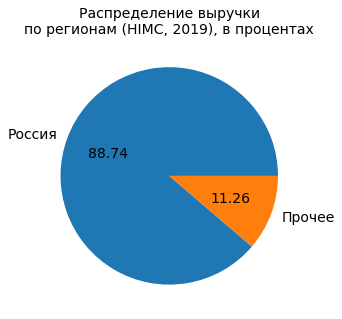

In [38]:
sales_structure.plot(kind='pie', subplots=True, figsize=(7, 5), autopct='%.2f', fontsize=14)
plt.title(f"Распределение выручки\nпо регионам ({company}, 2019), в процентах", fontsize=14)
plt.ylabel("");
# plt.savefig('../images/revenue_export.png', dpi=200)

По сравнению с 2018 годом доля России в выручке возросла.
Видимо тренд на Россию будет продолжаться и дальше, тем более, что компания участвует в программе по импортозамещению и будет забирать рынок в России

Статистики по продажам разных видов продуктов не представлено в отчёте МСФО.

In [3]:
# sales_structure2 = \
# pd.Series([29.997, 20.611, 6.833], 
#           index=['Капролактам и\nпродукты переработки','Аммиак и азотные\nудобрения', 'Прочее'])

In [4]:
# sales_structure2.plot(kind='pie', subplots=False, figsize=(7, 5), autopct='%.2f', fontsize=14)
# plt.title(f"Распределение выручки по типу\nпродукции ({company}, 2019), в процентах", fontsize=14)
# plt.ylabel("");
# # plt.savefig('../images/revenue_kind.png', dpi=200)

...

## Конкуренты

## Риски

1. *Кредитный риск* 
    (Химпром подвержен кредитному риску, т.к. никак не страхуется от него. "Все выданные займы не обеспечены имуществом, гарантиями и/или поручительствами и выданы компаниям, не имеющим официального кредитного рейтинга." *(из отчёта Химпром, МСФО 2019)*)
    
1. *Риск ликвидности*
    (Риск того, что у Химпрома возникнут сложности по выполнению фин. обязательств. Компания пытается держать необходимый уровень ликвидных средств)
    
* Компания не имеет полной страховой защиты своих производственных сооружений и прочего
* Компания опасается за правильный подсчёт налогов

## Дивидендная политика

На бирже торгуются привилегированные акции: у них нет права голоса по большинству вопросов, но зато они имеют право на дивиденды (максимум из: 10% чистой прибыли по РСБУ и дивидендов по обыкновенным акциям)

In [18]:
# name = "Доля чистой прибыли, направленной\nна дивиденды"
# dt['dividend'] = dt['dividend_per_share']*dt['n_shares']
# plt.plot( dt.index, 100*dt['dividend']/dt['net_profit'], marker='o', ms=10, label='Дивиденды/акция' )
# plt.xticks(dt.index, dt.index.astype('str'))
# # plt.legend()
# plt.title(f'{name} за последние {n_years} лет ({company})')
# plt.ylim(0, None)
# plt.xlabel('Год')
# plt.ylabel('Доля, в процентах')
# plt.grid(ls='--')
# plt.savefig('../images/dividend_net_profit.png', dpi=200)

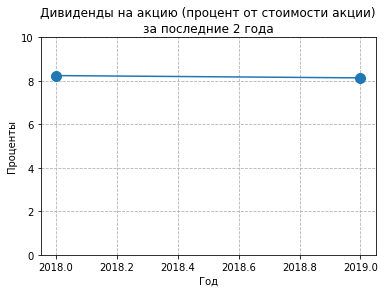

In [22]:
name = "Дивиденды на акцию (процент от стоимости акции)"
plt.plot( dt.index, 100*dt['dividend_pref']/dt['preffered_stocks']/dt['price_pref'], marker='o', ms=10, label='' )
# plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 2 года')#{n_years} лет ({company})')
plt.ylim(0, 10)
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')
# plt.savefig('../images/dividend_share_percent.png', dpi=200)

Взял данные со [смарт-лаба](https://smart-lab.ru/q/HIMC/dividend/)

## ROA

Отвечает на вопрос, выгоднее ли "владельцу" всё продать и положить деньги на депозит?

In [23]:
assets = dt['assets'].values
mean_assets = (assets[:-1] + assets[1:])/2

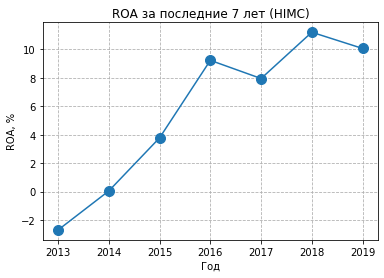

In [24]:
name = "ROA"
plt.plot( dt.index[1:], 100*dt['net_profit'][1:]/mean_assets, marker='o', ms=10, label=name )
plt.xticks(dt.index[1:], dt.index[1:].astype('str'))
# plt.legend()
# plt.ylim(0, None)
plt.title(f'{name} за последние {n_years-1} лет ({company})')
plt.xlabel('Год')
plt.ylabel('ROA, %')
plt.grid(ls='--')
plt.savefig('../images/ROA.png', dpi=200)

В последние годы всё стало слишком хорошо

## Оценка компании

Теперь, пользуясь мультипликаторами, можно попробовать проверить, недооценена или переоценена компания на бирже

### Капитализация

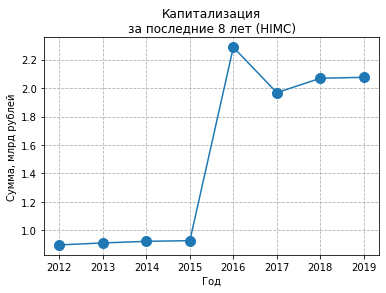

In [25]:
name = "Капитализация"
plt.plot( dt.index, dt['capitalization']*1e-9, marker='o', ms=10, label='Капитализация' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/capitalization.png', dpi=200)

...

### P/E
Через сколько лет окупится инвестиция, если прибыль останется на том же уровне и всю прибыль руководство направит на дивиденды

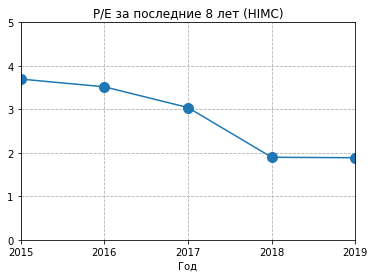

In [29]:
name = "P/E"
plt.plot( dt.index, dt['capitalization']/dt['net_profit'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.xlim(2015, 2019)
# plt.ylabel('')
plt.ylim(0, 5)
plt.grid(ls='--')
plt.savefig('../images/PE.png', dpi=200)

В последние годы P/E держится на довольно низком уровне, что хорошо

### P/S
Отношение рыночной капитализации компании к её годовой выручке. 
Показатель <1 может говорить о недооценённости компании

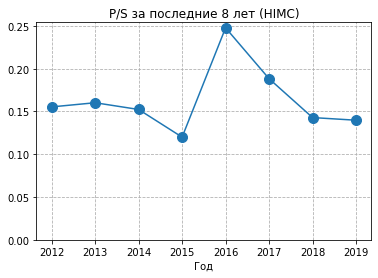

In [30]:
name = "P/S"
plt.plot( dt.index, dt['capitalization']/dt['revenue'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние {n_years} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/PS.png', dpi=200)

Так, а согласно этому показателю, компанию надо срочно брать

### EV/EBITDA

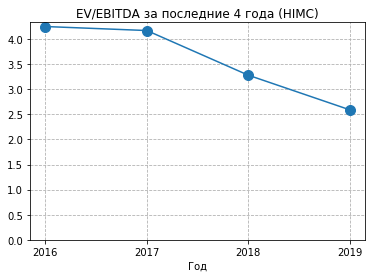

In [8]:
name = 'EV/EBITDA'
years = ['2016', '2017', '2018', '2019']
ev_ebitda = [4.25, 4.17, 3.28, 2.59]#[7.14, 6.88, 3.30, 7.25]
plt.plot(years, ev_ebitda, marker='o', ms=10, label=name )
# plt.legend()
plt.title(f'{name} за последние 4 года ({company})')
plt.xlabel('Год')
# plt.ylabel('') 
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../images/EV_EBITDA.png', dpi=200)

...

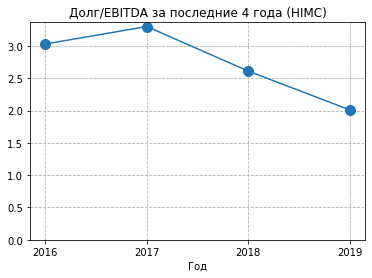

In [7]:
name = 'Долг/EBITDA'
years = ['2016', '2017', '2018', '2019']
debt_ebitda = [3.03, 3.30, 2.61, 2.01]
plt.plot(years, debt_ebitda, marker='o', ms=10, label=name )
# plt.legend()
plt.title(f'{name} за последние 4 года ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../images/Debt_EBITDA.png', dpi=200)

## [Планы](https://www.himprom.com/presscentr/news/11636/) на будущее

1. В 2019 построили единственное в РФ производство реагента для нейтрализации стоков процесса золотодобычи и водоподготовки
1. Реализуется (до 2022) создание нового производства пероксида водорода по антрахиноновой технологии мощностью 50 тысяч тонн в год
1. Несколько проектов по оптимизации затрат

## Вывод

Интересная компания с приличными показателями, может выиграть от коронавируса, есть над чем подумать